In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel(r"C:\Users\Prem\Downloads\archive (2)\spam.xlsx")

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
450,ham,hanks lotsly!,NaN,NaN,NaN
4779,ham,Sen told that he is going to join his uncle fi...,NaN,NaN,NaN
3640,spam,You can stop further club tones by replying \S...,"PO Box 1146 MK45 2WT (2/3)""",NaN,NaN
1846,ham,Its on in engalnd! But telly has decided it wo...,NaN,NaN,NaN
1763,ham,Joy's father is John. Then John is the NAME of...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
 #DATA CLEANING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#drop last 3 columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [ ]:
 df.sample(5)

,v1,v2
2790,spam,U‰Ûªve Bin Awarded å£50 to Play 4 Instant Cash...
1942,ham,K...k:)why cant you come here and search job:)
4662,ham,No. Yes please. Been swimming?
2967,ham,"Mostly sports type..lyk footbl,crckt.."
5089,ham,What type of stuff do you sing?


In [ ]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
2401,spam,Babe: U want me dont u baby! Im nasty and have...
4161,ham,How's it going? Got any exciting karaoke type ...
2562,ham,"Yeah I am, so I'll leave maybe 7ish?"
2816,spam,Gr8 Poly tones 4 ALL mobs direct 2u rply with ...
2568,ham,Hey. For me there is no leave on friday. Wait ...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#check for duplicate value
df.duplicated().sum()

403

In [ ]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
#EDA

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

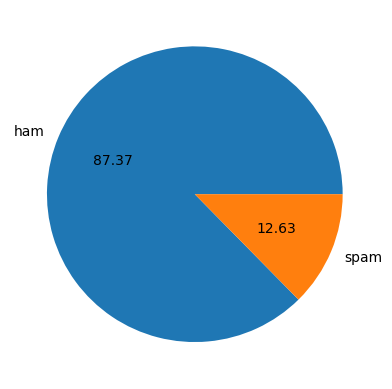

In [ ]:
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
#data is imbalanced

In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
print(type('text'))

<class 'str'>


In [ ]:
#number of characters
df['num_characters'] = df['text'].astype(str).apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#num of words
df['num_words'] = df['text'].astype(str).apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#num of sentences
df['num_sentences'] = df['text'].astype(str).apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.980267,18.455794,1.965564
std,58.239404,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#ham
df[df['target']==0]

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [ ]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.461913,17.123782,1.820195
std,56.362288,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
import warnings

# Suppress the warning
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated", category=FutureWarning)


<Axes: xlabel='num_characters', ylabel='Count'>

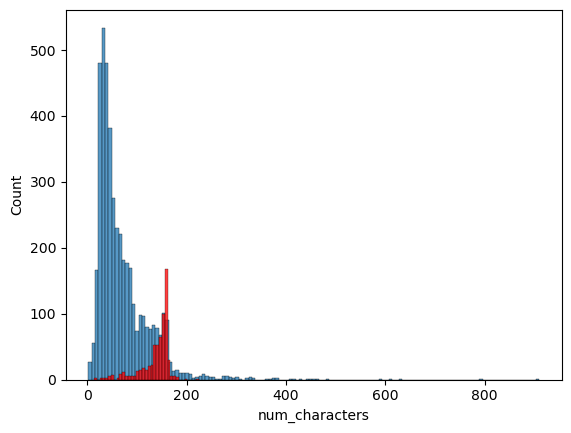

In [ ]:
sns.histplot(df[df['target']==0] ['num_characters'])
sns.histplot(df[df['target']==1] ['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

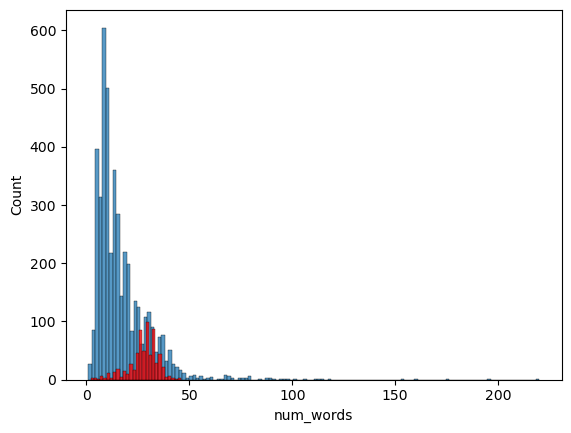

In [ ]:
sns.histplot(df[df['target']==0] ['num_words'])
sns.histplot(df[df['target']==1] ['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

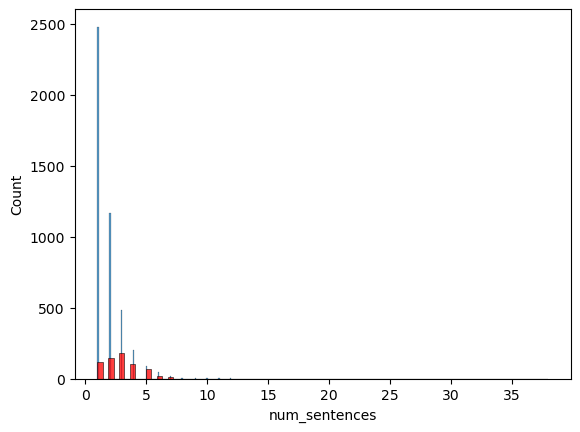

In [ ]:
sns.histplot(df[df['target']==0] ['num_sentences'])
sns.histplot(df[df['target']==1] ['num_sentences'],color='red')

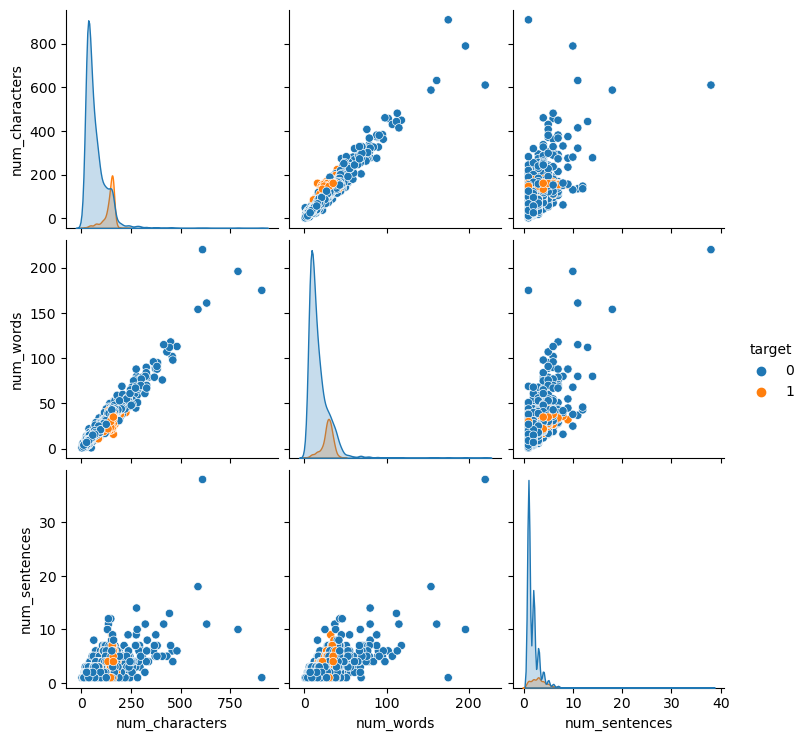

In [ ]:
sns.pairplot(df,hue='target')

<Axes: >

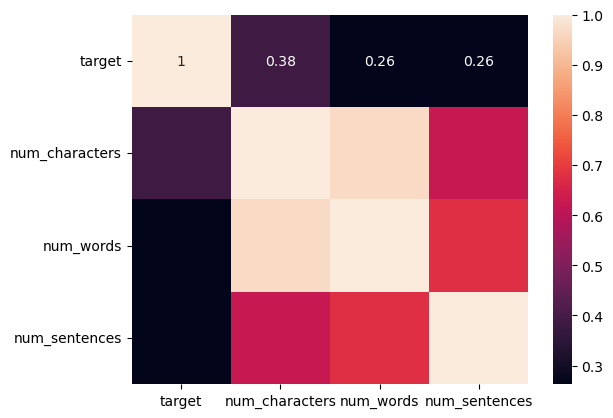

In [ ]:
numeric_df = df.select_dtypes(include='number')
correlations = numeric_df.corr()
sns.heatmap(correlations, annot=True)

In [ ]:
#DATA PREPROCESS

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
transform_text('This is my presentation on ML for next class.')

'present ml next class'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['text'] = df['text'].astype(str)
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 196.9 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/300.2 kB 302.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 423.5 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/300.2 kB 588.9 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/300.2 kB 627.5 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 706.2 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 706.2 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 706.2 kB/s eta 0:

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

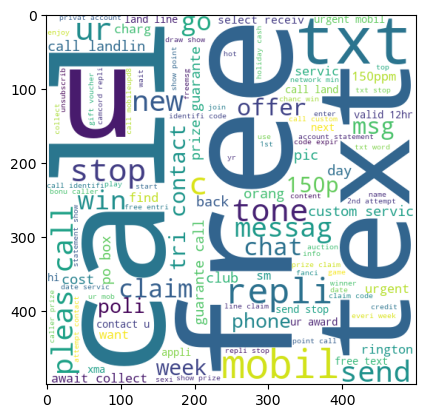

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

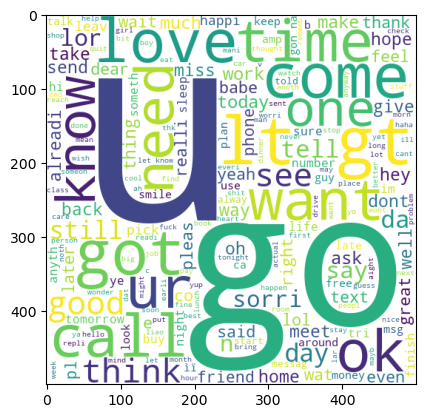

In [ ]:
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

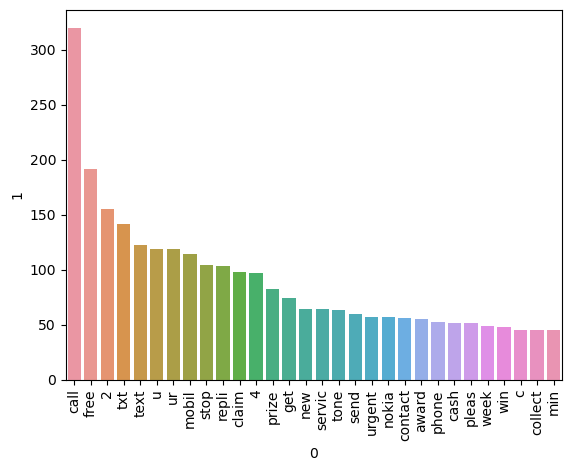

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Counter object from the spam_corpus
word_counts = Counter(spam_corpus)

# Convert Counter object to DataFrame and select the most common 30 words
df_word_counts = pd.DataFrame(word_counts.most_common(30))

# Plot the barplot with named arguments
sns.barplot(data=df_word_counts, x=0, y=1)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35402

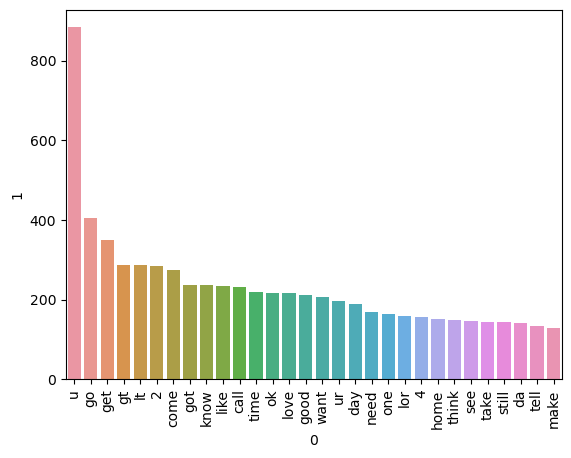

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
word_counts = Counter(ham_corpus)
df_word_counts = pd.DataFrame(word_counts.most_common(30))
sns.barplot(data=df_word_counts, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#MODEL BUILDING

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y=df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[790 106]
 [ 26 112]]
0.5137614678899083


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825918762088974
[[895   1]
 [ 17 121]]
0.9918032786885246


In [ ]:
#tf-idf

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBClassifier

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 220.2 kB/s eta 0:07:33
   ---------------------------------------- 0.0/99.8 MB 219.4 kB/s eta 0:07:35
   ---------------------------------------- 0.0/99.8 MB 219.4 kB/s eta 0:07:35
   ---------------------------------------- 0.0/99.8 MB 219.4 kB/s eta 0:07:35
   ---------------------------------------- 0.0/99.8 MB 219.4 kB/s eta 0:07:35
   ---------------------------------------- 0.1/99.8 MB 344.8 kB/s eta 0:04:49
   ---------------------------------------- 0.1/99.8 MB 344.8 kB/s eta 0:04:49
   ---------------------------------------- 0.1/99.8 MB 344.8 kB/s eta 0:04:49
   ---------------------------------------- 0.1/99.8 MB 344.8 kB/s eta 0:04:49
   ---------------------------------------- 0.1/99.8 MB 344.8 kB/s eta 0:04:49


In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
For  LR
Accuracy -  0.9574468085106383
Precision -  0.97
For  RF
Accuracy -  0.9709864603481625
Precision -  0.9655172413793104
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9369369369369369
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.8604651162790697
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492
For  GBDT
Accuracy -  0.9487427466150871
Precision -  0.9292929292929293
For  xgb
Accuracy -  0.9661508704061895
Precision -  0.9401709401709402


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.971954,1.000000
8,ETC,0.980658,0.983607
0,SVC,0.974855,0.974576
4,LR,0.957447,0.970000
5,RF,0.970986,0.965517
10,xgb,0.966151,0.940171
6,AdaBoost,0.960348,0.936937
9,GBDT,0.948743,0.929293
7,BgC,0.956480,0.860465


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.971954
2,ETC,Accuracy,0.980658
3,SVC,Accuracy,0.974855
4,LR,Accuracy,0.957447
5,RF,Accuracy,0.970986
6,xgb,Accuracy,0.966151
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.948743
9,BgC,Accuracy,0.956480


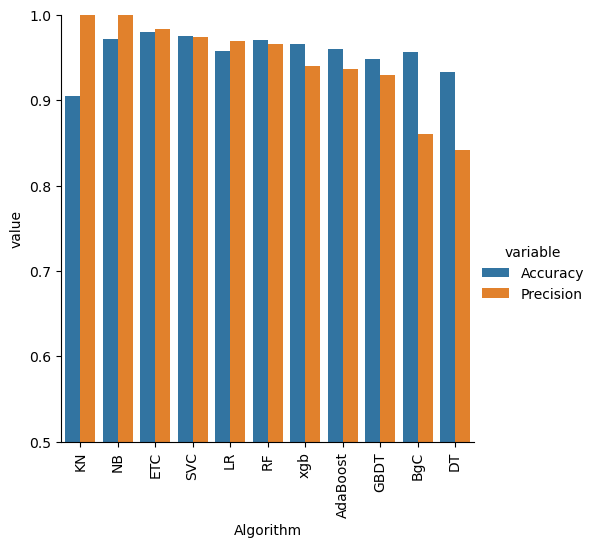

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# change the mx_features parameter of TFIDF

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,ETC,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607
3,SVC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
4,LR,0.957447,0.970000,0.957447,0.970000,0.957447,0.970000,0.957447,0.970000
5,RF,0.970986,0.965517,0.970986,0.965517,0.970986,0.965517,0.970986,0.965517
6,xgb,0.966151,0.940171,0.966151,0.940171,0.966151,0.940171,0.966151,0.940171
7,AdaBoost,0.960348,0.936937,0.960348,0.936937,0.960348,0.936937,0.960348,0.936937
8,GBDT,0.948743,0.929293,0.948743,0.929293,0.948743,0.929293,0.948743,0.929293
9,BgC,0.956480,0.860465,0.956480,0.860465,0.956480,0.860465,0.956480,0.860465


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9918032786885246


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9541984732824428


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))